In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/diploma/data_news.csv", encoding='latin-1')

In [22]:
df = df.drop(df[df['text_news'].apply(len) < 100].index)

In [23]:
import re
import string
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def preprocess_text(text):
    """
    Function to preprocess text data by performing the following steps:
    1. Convert all text to lowercase
    2. Remove punctuation
    3. Remove stop words
    4. Lemmatize words
    
    Args:
    text - string, text to be preprocessed
    
    Returns:
    processed_text - string, preprocessed text
    """
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    pattern = re.compile('[^\x00-\x7F]+')
    text = pattern.sub('', text)
    # Tokenize text
    tokens = nltk.word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join tokens back into string
    processed_text = ' '.join(tokens)
    
    return processed_text


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [24]:
df["text_news"] = df.text_news.apply(preprocess_text)
df

,date,time,text_news,label
0,22/02/2022,13:50:00,dpr said ukrainian security force used grad ml...,False
4,22/02/2022,14:07:00,rely strength rule turn russian federation mil...,False
5,22/02/2022,14:08:00,parliament ukraine adopted statement calling r...,False
6,22/02/2022,14:08:00,russia recognized independence dpr lpr donetsk...,False
9,22/02/2022,14:31:00,hungary meeting committee permanent representa...,False
...,...,...,...,...
14484,24/04/2023,08:03:00,meeting minister defense turkey russia syria i...,False
14485,24/04/2023,11:46:00,kiev never enough people equipment professiona...,False
14486,24/04/2023,11:52:00,ukrainian troop left couple brigade artemovsk ...,False
14487,24/04/2023,12:47:00,today 330 kiev regime made attempt attack base...,False


In [25]:
df.to_csv('/content/drive/MyDrive/Colab_Notebooks/diploma/analys_clean_data.csv',sep='\t')

In [26]:
import matplotlib.pyplot as plt

def plot_label_distribution(df):
    """
    Function to visualize the distribution of labels in the dataset
    
    Args:
    df - pandas dataframe, dataset
    
    Returns:
    None
    """
    labels = df['label'].value_counts()
    plt.bar(labels.index, labels.values)
    plt.xticks([0, 1])
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.title('Distribution of Labels')
    for i, v in enumerate(labels.values):
        plt.text(i, v, str(v), ha='center', va='bottom')
        plt.text(i, v/2, str(labels.index[i]), ha='center', va='center')
    plt.show()


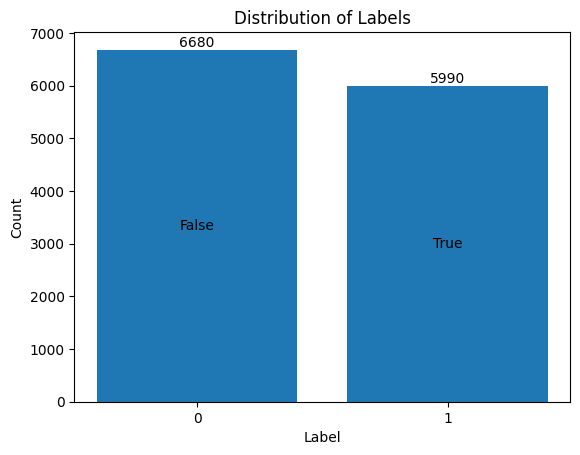

In [27]:
plot_label_distribution(df)

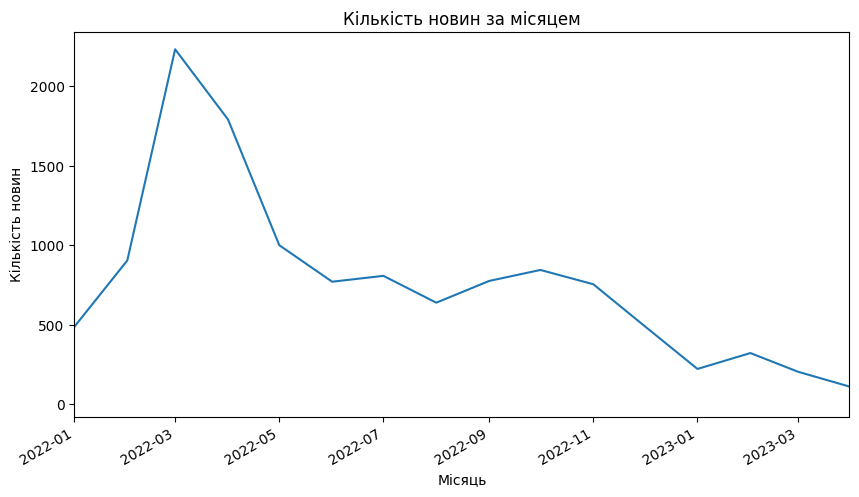

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_news_count(df):
    
    df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
    end_date = pd.to_datetime('2023-03-31')
    # групування за місяцем та підрахунок кількості новин
    news_count = df.groupby(df['datetime'].dt.to_period('M')).size()

    # отримання дат з індексу
    x_dates = news_count.index.to_timestamp()

    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111)

    ax.set_title('', loc='left', y=0.85, x=0.02, fontsize='medium')
    # Text in the x-axis will be displayed in 'YYYY-mm' format.
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    # Rotates and right-aligns the x labels so they don't crowd each other.
    for label in ax.get_xticklabels():
        label.set(rotation=30, horizontalalignment='right')
    ax.set_xlim(left=x_dates[0], right=end_date)
    ax.plot(x_dates, news_count.values)

    plt.xlabel('Місяць')
    plt.ylabel('Кількість новин')
    plt.title('Кількість новин за місяцем')
    plt.show()

plot_news_count(df)

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from google.colab import drive

def plot_word_frequency_by_label(df, label, filename):
    # Фільтруємо DataFrame за міткою label
    df_filtered = df[df['label'] == label]
    
    # Об'єднуємо текст новин в один рядок
    text = ' '.join(df_filtered['text_news'])
    
    # Токенізуємо текст на окремі слова
    tokens = word_tokenize(text)
    
    # Обчислюємо частотний розподіл слів
    fdist = FreqDist(tokens)
    
    # Виводимо діаграму частоти слів
    plt.figure(figsize=(10, 6))
    fdist.plot(30, title=f'Most common words for label {label}')
    plt.show()
    plt.savefig(filename)


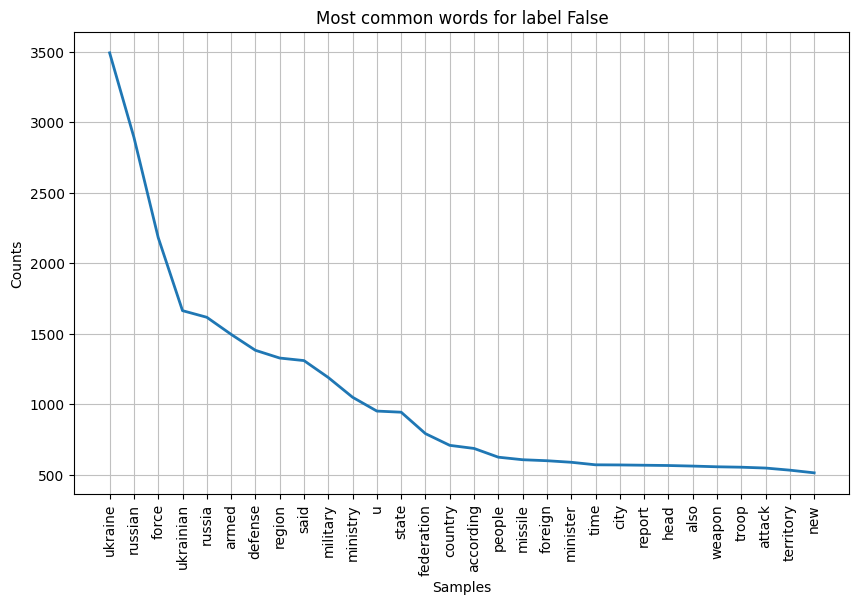

<Figure size 640x480 with 0 Axes>

In [30]:
plot_word_frequency_by_label(df, False, '/content/drive/MyDrive/Colab_Notebooks/diploma/plots/frequency_falsenews.png')

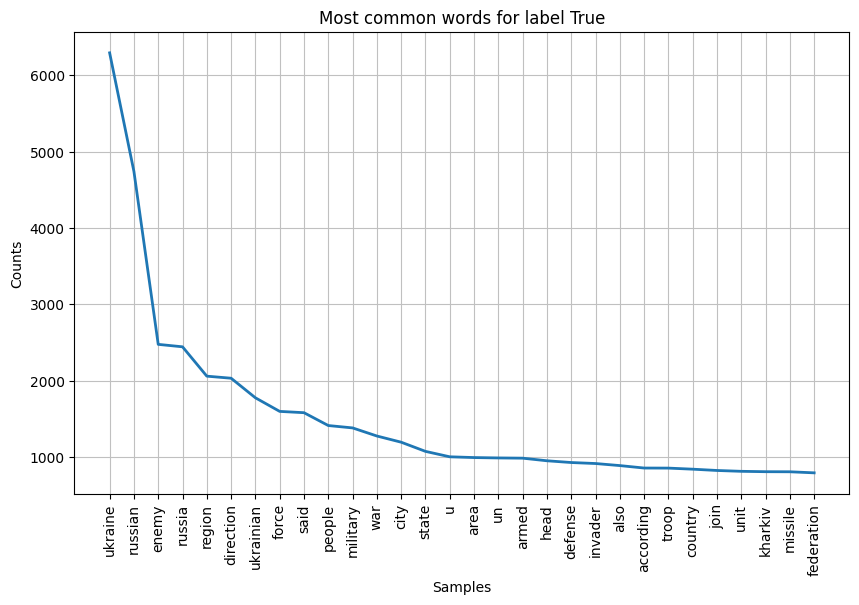

<Figure size 640x480 with 0 Axes>

In [31]:
plot_word_frequency_by_label(df, True, '/content/drive/MyDrive/Colab_Notebooks/diploma/plots/frequency_truenews.png')

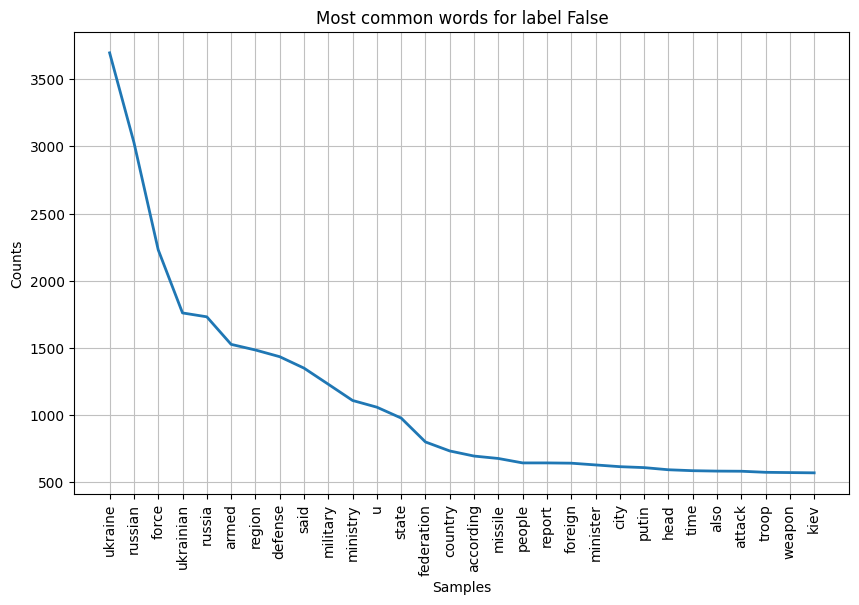

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_word_frequency_by_label(df, False, '/content/drive/MyDrive/Colab_Notebooks/diploma/plots/frequency_falsenews.png')

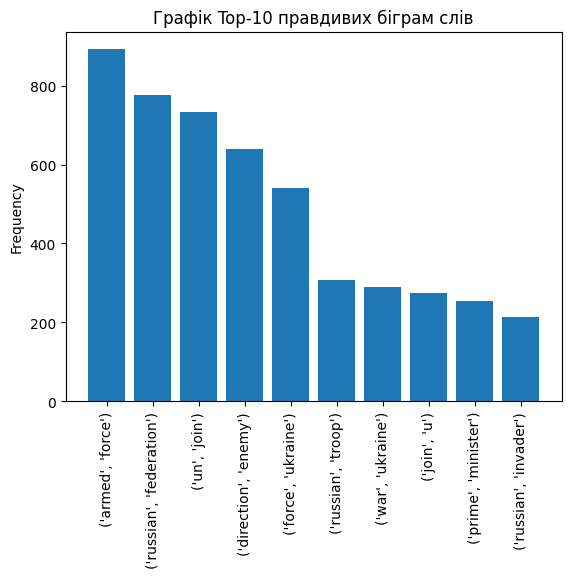

In [32]:
import pandas as pd
import nltk
from nltk import bigrams
from collections import Counter
import matplotlib.pyplot as plt

# Фільтруємо DataFrame за міткою label
df_filtered = df[df['label'] == 1]
text = ' '.join(df_filtered['text_news'])

# Розбиваємо текст на слова
tokens = nltk.word_tokenize(text)

bi_tokens = list(bigrams(tokens))

# Підрахунок кількості кожної біграми
bi_counts = Counter(bi_tokens)

# Відбір топ-10 найчастіших біграм
top_bi_counts = bi_counts.most_common(10)

# Розділення біграм та їх частот у окремі списки
bigram_list, count_list = zip(*top_bi_counts)

# Побудова графіку
plt.bar(range(len(top_bi_counts)), count_list)
plt.xticks(range(len(top_bi_counts)), bigram_list, rotation=90)
plt.ylabel('Frequency')
plt.title('Графік Top-10 правдивих біграм слів')
plt.show()

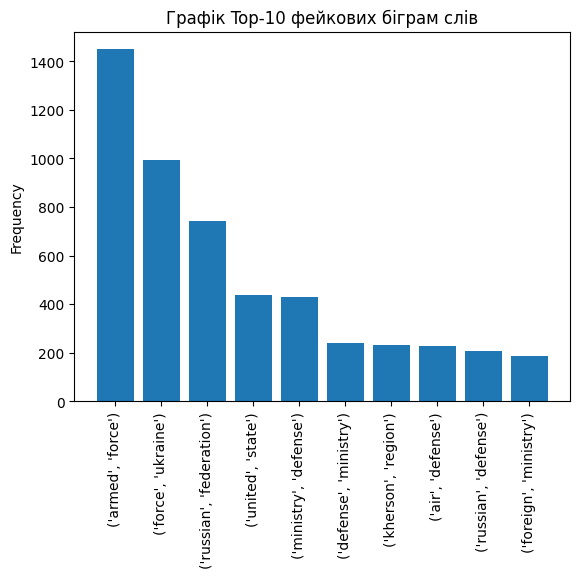

In [33]:
import pandas as pd
import nltk
from nltk import bigrams
from collections import Counter
import matplotlib.pyplot as plt

# Фільтруємо DataFrame за міткою label
df_filtered = df[df['label'] == 0]
text = ' '.join(df_filtered['text_news'])

# Розбиваємо текст на слова
tokens = nltk.word_tokenize(text)

bi_tokens = list(bigrams(tokens))

# Підрахунок кількості кожної біграми
bi_counts = Counter(bi_tokens)

# Відбір топ-10 найчастіших біграм
top_bi_counts = bi_counts.most_common(10)

# Розділення біграм та їх частот у окремі списки
bigram_list, count_list = zip(*top_bi_counts)

# Побудова графіку
plt.bar(range(len(top_bi_counts)), count_list)
plt.xticks(range(len(top_bi_counts)), bigram_list, rotation=90)
plt.ylabel('Frequency')
plt.title('Графік Top-10 фейкових біграм слів')
plt.show()